In [1]:
import pandas as pd
import requests
from io import StringIO

def read_file(file_path, file_type):
    if file_type.lower() == 'csv':
        df = pd.read_csv(file_path)
    elif file_type.lower() == 'xlsx':
        df = pd.read_excel(file_path)
    elif file_type.lower() == 'url':
        response = requests.get(file_path)
        data = response.content.decode('utf-8')
        df = pd.read_csv(StringIO(data))
    elif file_type.lower() == 'json':
        df = pd.read_json(file_path)
    elif file_type.lower() == 'text':
        with open(file_path, 'r') as file:
            data = file.read()
        df = pd.DataFrame({'text': [data]})
    else:
        raise ValueError("Invalid file type. Supported types are: CSV, XLSX, URL, JSON, Text")
    
    return df

file_path = input("Enter the file path or URL: ")
file_type = input("Enter the file type (CSV, XLSX, URL, JSON, Text): ")

df = read_file(file_path, file_type)

#C:\Users\LENOVO\cnn_5550296508.csv
print(df.head())

Enter the file path or URL: C:\Users\LENOVO\cnn_5550296508.csv
Enter the file type (CSV, XLSX, URL, JSON, Text): csv
                                id     page_id  \
0  ﻿"5550296508_10150712177946509"  5550296508   
1    ﻿"5550296508_258636547563092"  5550296508   
2  ﻿"5550296508_10150712540566509"  5550296508   
3    ﻿"5550296508_350156181698587"  5550296508   
4    ﻿"5550296508_140431756086124"  5550296508   

                                                name  \
0                                                NaN   
1       How nations risk nuclear terrorism - CNN.com   
2     Facebook wants court to dismiss Ceglia lawsuit   
3  Report: Zimmerman told police teen punched him...   
4  Supreme Court divided over health care mandate...   

                                             message  \
0  Breaking News: French prosecutors: Former IMF ...   
1  CNN Opinion Contributor Richard Chasdi states ...   
2  'Ceglia has forged documents, destroyed eviden...   
3  An Orlando Sentine

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31696 entries, 0 to 31695
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              31696 non-null  object
 1   page_id         31696 non-null  int64 
 2   name            29816 non-null  object
 3   message         31091 non-null  object
 4   description     18797 non-null  object
 5   caption         22184 non-null  object
 6   post_type       31696 non-null  object
 7   status_type     31664 non-null  object
 8   likes_count     31696 non-null  int64 
 9   comments_count  31696 non-null  int64 
 10  shares_count    31696 non-null  int64 
 11  love_count      31696 non-null  int64 
 12  wow_count       31696 non-null  int64 
 13  haha_count      31696 non-null  int64 
 14  sad_count       31696 non-null  int64 
 15  thankful_count  31696 non-null  int64 
 16  angry_count     31696 non-null  int64 
 17  link            31248 non-null  object
 18  pictur

In [145]:
df.describe()

,page_id,likes_count,comments_count,shares_count,love_count,wow_count,haha_count,sad_count,thankful_count,angry_count
count,3.169600e+04,3.169600e+04,31696.000000,3.169600e+04,31696.000000,31696.000000,31696.000000,31696.000000,31696.000000,31696.000000
mean,5.550297e+09,4.218814e+03,742.776218,1.460405e+03,134.203149,71.098088,85.498265,114.827139,0.067674,84.207566
std,0.000000e+00,1.318657e+04,1964.627591,1.440600e+04,1239.543133,564.055115,576.071482,1554.700428,3.691511,870.131719
min,5.550297e+09,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.550297e+09,9.910000e+02,148.000000,1.380000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.550297e+09,1.960000e+03,334.000000,3.530000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.550297e+09,4.028250e+03,809.000000,9.600000e+02,19.000000,21.000000,8.000000,5.000000,0.000000,5.000000
max,5.550297e+09,1.155249e+06,237266.000000,1.934157e+06,156066.000000,45708.000000,34904.000000,149098.000000,509.000000,117430.000000


In [146]:
df.isnull().sum()

id                    0
page_id               0
name               1880
message             605
description       12899
caption            9512
post_type             0
status_type          32
likes_count           0
comments_count        0
shares_count          0
love_count            0
wow_count             0
haha_count            0
sad_count             0
thankful_count        0
angry_count           0
link                448
picture             523
posted_at             0
dtype: int64

In [2]:
# Step 1: Data Preprocessing
# Replace null values
df['description'].fillna('unknown', inplace=True)
df['name'].fillna('unknown', inplace=True)
df['link'].fillna('no link', inplace=True)
df['picture'].fillna('no link', inplace=True)
df['caption'].fillna('no caption', inplace=True)
df['status_type'].fillna('others', inplace=True)
# Drop rows with null values in the "message" column
df.dropna(subset=['message'], inplace=True)

In [3]:
df.isnull().sum()

id                0
page_id           0
name              0
message           0
description       0
caption           0
post_type         0
status_type       0
likes_count       0
comments_count    0
shares_count      0
love_count        0
wow_count         0
haha_count        0
sad_count         0
thankful_count    0
angry_count       0
link              0
picture           0
posted_at         0
dtype: int64

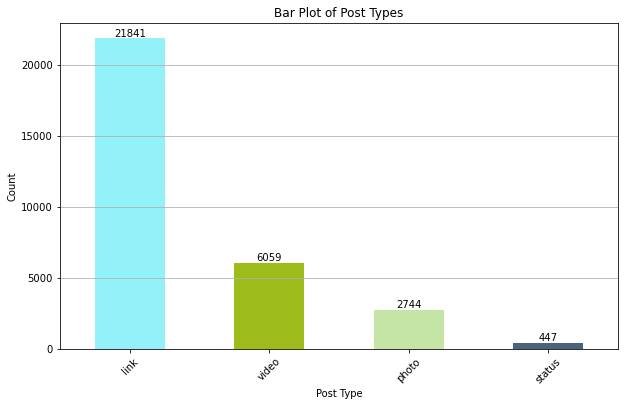

In [149]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Get unique post types and their counts
post_type_counts = df['post_type'].value_counts()

# Generate random colors
colors = np.random.rand(len(post_type_counts), 3)

# Plot bar plot with random colors
ax = post_type_counts.plot(kind='bar', color=colors)
plt.title('Bar Plot of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add count labels on top of each bar
for i, count in enumerate(post_type_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

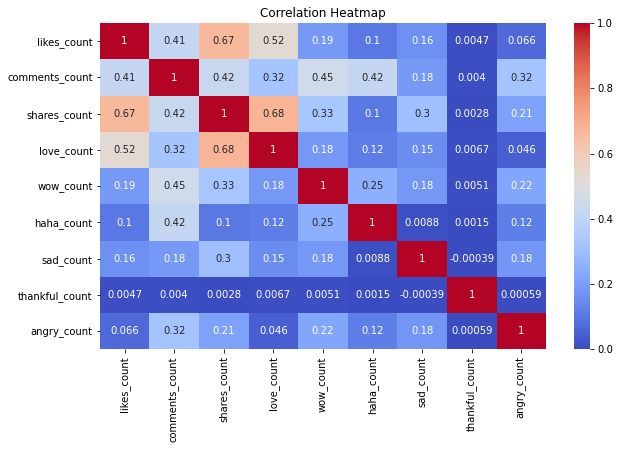

In [150]:
# Plotting a heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df[['likes_count', 'comments_count', 'shares_count', 'love_count', 'wow_count', 'haha_count', 'sad_count', 'thankful_count', 'angry_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

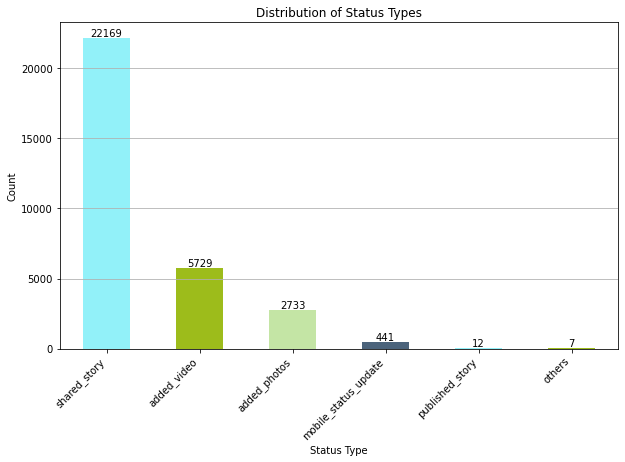

In [151]:
import matplotlib.pyplot as plt

# Count the occurrences of each status type
status_type_counts = df['status_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = status_type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Status Types')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Add counts on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow

In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from textblob import TextBlob

# Initialize TweetTokenizer
tokenizer = TweetTokenizer()

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def pos_tagging_and_lemmatization(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lowercase conversion
    tokens = [word.lower() for word in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove punctuation and special symbols
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatization with POS tagging
    lemmatized_tokens = []
    for word, tag in pos_tags:
        pos = tag[0].lower()  # Convert POS tag to lowercase
        pos = pos if pos in ['a', 'n', 'v'] else 'n'  # Map POS tag to WordNet POS tag
        lemma = lemmatizer.lemmatize(word, pos=pos)  # Perform lemmatization
        lemmatized_tokens.append(lemma)
    
    return ' '.join(lemmatized_tokens)

def preprocess_nlp_columns(df):
    columns = input("Enter column names separated by spaces: ").split()
    for column in columns:
        df['tokenized_' + column + '_lemmatized_pos'] = df[column].apply(pos_tagging_and_lemmatization)
        
preprocess_nlp_columns(df)

Enter column names separated by spaces: message


This code snippet performs text preprocessing using NLTK and defines a function `pos_tagging_and_lemmatization` to tokenize, remove stopwords, remove punctuation, perform POS tagging, and lemmatize the text. Here's an explanation of each part:

1. **NLTK Imports**:
   - `nltk` is imported, which is a natural language processing library in Python.
   - Various modules from NLTK are imported:
     - `TweetTokenizer`: A tokenizer designed specifically for tweets.
     - `word_tokenize`: A function to tokenize words from sentences.
     - `stopwords`: A corpus of stopwords in different languages.
     - `WordNetLemmatizer`: A lemmatizer based on WordNet.

2. **Initializing Tokenizer and Lemmatizer**:
   - `TweetTokenizer` and `WordNetLemmatizer` objects are initialized.

3. **POS Tagging and Lemmatization Function** (`pos_tagging_and_lemmatization`):
   - This function takes a text input and performs the following steps:
     - Tokenizes the text using `word_tokenize`.
     - Converts tokens to lowercase.
     - Removes stopwords using the English stopwords provided by NLTK.
     - Removes punctuation using the `string.punctuation` module.
     - Performs POS tagging using `pos_tag`.
     - Lemmatizes each token based on its POS tag using `lemmatizer.lemmatize`.
     - Joins the lemmatized tokens back into a string and returns it.

4. **Applying POS Tagging and Lemmatization**:
   - The `pos_tagging_and_lemmatization` function is applied to the 'message' column of the DataFrame (`df['message']`) and the result is stored in a new column named 'tokenized_message_lemmatized_pos'.

Overall, this code prepares text data for further analysis or modeling by tokenizing, removing stopwords and punctuation, performing POS tagging, and lemmatizing the text. This preprocessing step is commonly used in natural language processing tasks to improve the quality of text data for downstream tasks like sentiment analysis, classification, or information retrieval.

In [9]:
# Perform sentiment analysis and assign sentiment labels
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_label'] = df['tokenized_message_lemmatized_pos'].apply(get_sentiment)

In [10]:
df.head()

,id,page_id,name,message,description,caption,post_type,status_type,likes_count,comments_count,...,wow_count,haha_count,sad_count,thankful_count,angry_count,link,picture,posted_at,tokenized_message_lemmatized_pos,sentiment_label
0,"﻿""5550296508_10150712177946509""",5550296508,unknown,Breaking News: French prosecutors: Former IMF ...,unknown,no caption,status,mobile_status_update,348,143,...,0,0,0,0,0,no link,no link,2012-03-26T21:27:01,break news french prosecutor former imf chief ...,Neutral
1,"﻿""5550296508_258636547563092""",5550296508,How nations risk nuclear terrorism - CNN.com,CNN Opinion Contributor Richard Chasdi states ...,Richard Chasdi says that nations that empower ...,cnn.com,link,shared_story,542,118,...,0,0,0,0,0,http://www.cnn.com/2012/03/26/opinion/chasdi-n...,https://external.xx.fbcdn.net/safe_image.php?d...,2012-03-26T21:30:27,cnn opinion contributor richard chasdi state e...,Positive
2,"﻿""5550296508_10150712540566509""",5550296508,Facebook wants court to dismiss Ceglia lawsuit,"'Ceglia has forged documents, destroyed eviden...",Paul Ceglia originally filed the attention-gra...,money.cnn.com,link,published_story,185,67,...,0,0,0,0,0,http://cnnmon.ie/HdBpwG,https://external.xx.fbcdn.net/safe_image.php?d...,2012-03-27T01:30:45,'ceglia forge document destroy evidence abuse ...,Negative
3,"﻿""5550296508_350156181698587""",5550296508,Report: Zimmerman told police teen punched him...,An Orlando Sentinel report fills in some blank...,"A month ago Monday, Trayvon Martin, an unarmed...",cnn.com,link,shared_story,488,3009,...,0,0,0,0,0,http://www.cnn.com/2012/03/26/justice/florida-...,https://external.xx.fbcdn.net/safe_image.php?d...,2012-03-27T13:41:26,orlando sentinel report fill blank purportedly...,Positive
4,"﻿""5550296508_140431756086124""",5550296508,Supreme Court divided over health care mandate...,At the core of the health care law is the indi...,The Supreme Court appeared divided Tuesday ove...,cnn.com,link,shared_story,538,782,...,0,0,0,0,0,http://www.cnn.com/2012/03/27/justice/scotus-h...,https://external.xx.fbcdn.net/safe_image.php?d...,2012-03-27T17:52:15,core health care law individual mandate provis...,Neutral


In [158]:
# Calculate word count for each message
df['word_count'] = df['tokenized_message_lemmatized_pos'].apply(lambda x: len(x.split()))

# Calculate average word count
average_word_count = df['word_count'].mean()
print("Average Word Count:", average_word_count)

Average Word Count: 15.087388633366569


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler

def feature_extraction(df, text_column, numerical_features, target_column):
    # Text Data Processing
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(df[text_column])
    X_text = tokenizer.texts_to_sequences(df[text_column])
    X_text = pad_sequences(X_text, maxlen=100)

    # Adding numerical features
    scaler = StandardScaler()
    X_numerical = df[numerical_features].values
    X_numerical_scaled = scaler.fit_transform(X_numerical)

    # Concatenate text and numerical features
    X = np.concatenate((X_text, X_numerical_scaled), axis=1)

    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[target_column])

    return X, y


numerical_features = input("Enter numerical features separated by spaces: ").split()
text_column = 'tokenized_message_lemmatized_pos'
target_column = 'sentiment_label'
X, y = feature_extraction(df, text_column, numerical_features, target_column)


Enter numerical features separated by spaces: likes_count comments_count shares_count


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def build_train_evaluate_model(df, text_column, numerical_features, target_column, model_type):
    if model_type.lower() == 'cnn':
        
        # CNN Model Building
        tokenizer = Tokenizer(num_words=10000)
        tokenizer.fit_on_texts(df[text_column])
        X_text = tokenizer.texts_to_sequences(df[text_column])
        X_text = pad_sequences(X_text, maxlen=100)

        scaler = StandardScaler()
        X_numerical = df[numerical_features].values
        X_numerical_scaled = scaler.fit_transform(X_numerical)

        X = np.concatenate((X_text, X_numerical_scaled), axis=1)

        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df[target_column])

        input_text = Input(shape=(100,))
        embedding = Embedding(input_dim=10000, output_dim=50, input_length=100)(input_text)
        conv1d = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding)
        global_max_pooling = GlobalMaxPooling1D()(conv1d)

        input_numerical = Input(shape=(len(numerical_features),))
        concatenated = Concatenate()([global_max_pooling, input_numerical])
        dense1 = Dense(64, activation='relu')(concatenated)
        dropout = Dropout(0.5)(dense1)
        output = Dense(3, activation='softmax')(dropout)

        model = Model(inputs=[input_text, input_numerical], outputs=output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        
    elif model_type.lower() == 'rnn':
        # RNN Model Building
        tokenizer = Tokenizer(num_words=10000)
        tokenizer.fit_on_texts(df[text_column])
        X_text = tokenizer.texts_to_sequences(df[text_column])
        X_text = pad_sequences(X_text, maxlen=100)

        scaler = StandardScaler()
        X_numerical = df[numerical_features].values
        X_numerical_scaled = scaler.fit_transform(X_numerical)

        X = np.concatenate((X_text, X_numerical_scaled), axis=1)

        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df[target_column])

        input_text = Input(shape=(100,))
        embedding = Embedding(input_dim=10000, output_dim=50, input_length=100)(input_text)
        lstm = LSTM(64)(embedding)
        dense1 = Dense(64, activation='relu')(lstm)
        dropout = Dropout(0.5)(dense1)
        output = Dense(3, activation='softmax')(dropout)

        model = Model(inputs=input_text, outputs=output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()

    elif model_type.lower() == 'kmeans':
        # K-Means Model
        # Extract features for K-Means
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df['sentiment_label'])

        # Define X based on the features you want to use for clustering
        X = df[numerical_features].values  # Adjust this based on your numerical features

        # K-Means clustering
        num_clusters = int(input("Enter the number of clusters: "))
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        y_pred = kmeans.fit_predict(X)

        # Silhouette Score
        silhouette_avg = silhouette_score(X, y_pred)
        print(f"Silhouette Score: {silhouette_avg}")

        # Dimensionality reduction for visualization (e.g., PCA)
        from sklearn.decomposition import PCA
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X)

        # Visualization of Clusters in 3D after PCA
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        colors = ['r', 'g', 'b']
        for i in range(num_clusters):
            ax.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], X_pca[y_pred == i, 2], c=colors[i], s=50, label=f'Cluster {i}')

        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title('K-Means Clustering based on sentiment_label in 3D')
        ax.legend()
        plt.show()

        return


    elif model_type.lower() == 'knn':
        # KNN Model
        scaler = StandardScaler()
        X_numerical = df[numerical_features].values
        X_numerical_scaled = scaler.fit_transform(X_numerical)

        knn = KNeighborsClassifier(n_neighbors=3)
        X_train, X_test, y_train, y_test = train_test_split(X_numerical_scaled, df[target_column], test_size=0.2, random_state=42)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        print("Accuracy (KNN):", accuracy)
        print("Classification Report:")
        print(report)

        return

    else:
        # Machine Learning Models
        tokenizer = Tokenizer(num_words=10000)
        tokenizer.fit_on_texts(df[text_column])
        X_text = tokenizer.texts_to_sequences(df[text_column])
        X_text = pad_sequences(X_text, maxlen=100)

        scaler = StandardScaler()
        X_numerical = df[numerical_features].values
        X_numerical_scaled = scaler.fit_transform(X_numerical)

        X = np.concatenate((X_text, X_numerical_scaled), axis=1)

        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(df[target_column])

        if model_type.lower() == 'svm':
            model = SVC()
        elif model_type.lower() == 'logistic':
            model = LogisticRegression()
        elif model_type.lower() == 'decisiontree':
            model = DecisionTreeClassifier()
        elif model_type.lower() == 'randomforest':
            model = RandomForestClassifier()
        elif model_type.lower() == 'xgboost':
            model = XGBClassifier()
        elif model_type.lower() == 'naivebayes':
            model = GaussianNB()
        else:
            raise ValueError("Invalid model type. Please choose from: CNN, RNN, SVM, Logistic, DecisionTree, RandomForest, XGBoost, NaiveBayes, KMeans, or KNN.")

    # Model Training
    if model_type.lower() == 'cnn':
        X_train_text, X_test_text, X_train_numerical, X_test_numerical, y_train, y_test = train_test_split(X_text, X_numerical_scaled, y, test_size=0.2, random_state=42)
        model.fit([X_train_text, X_train_numerical], y_train, epochs=10, batch_size=64, validation_data=([X_test_text, X_test_numerical], y_test))
        y_pred = np.argmax(model.predict([X_test_text, X_test_numerical]), axis=-1)

    elif model_type.lower() == 'rnn':
        X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)
        model.fit(X_train_text, y_train, epochs=10, batch_size=64, validation_data=(X_test_text, y_test))
        y_pred = np.argmax(model.predict(X_test_text), axis=-1)

    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)

    
while True:
    # Specify the model type you want to use
    model_type = input("Enter model type (CNN, RNN, SVM, Logistic, DecisionTree, RandomForest, XGBoost, NaiveBayes, KMeans, KNN): ")

    build_train_evaluate_model(df, text_column, numerical_features, target_column, model_type)

    choice = input("Do you want to try another model? (yes/no): ")
    if choice.lower() != 'yes':
        break

Enter model type (CNN, RNN, SVM, Logistic, DecisionTree, RandomForest, XGBoost, NaiveBayes, KMeans, KNN): cnn
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 100, 50)              500000    ['input_16[0][0]']            
                                                                                                  
 conv1d_7 (Conv1D)           (None, 96, 128)              32128     ['embedding_8[0][0]']         
                                                                                                  
 global_max_pooling1d_7 (Gl  (None, 128)                  0         ['conv1d_7[0]

Accuracy (KNN): 0.3651712493970092
Classification Report:
              precision    recall  f1-score   support

    Negative       0.21      0.33      0.26      1217
     Neutral       0.39      0.33      0.36      2348
    Positive       0.46      0.41      0.44      2654

    accuracy                           0.37      6219
   macro avg       0.36      0.36      0.35      6219
weighted avg       0.39      0.37      0.37      6219

Do you want to try another model? (yes/no): yes
Enter model type (CNN, RNN, SVM, Logistic, DecisionTree, RandomForest, XGBoost, NaiveBayes, KMeans, KNN): NaiveBayes
Accuracy: 0.38060781476121563
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.05      1217
           1       0.39      0.99      0.55      2348
           2       0.58      0.01      0.01      2654

    accuracy                           0.38      6219
   macro avg       0.39      0.34      0.21      6219
weighted avg     